## FRED

En la siguiente liga podemos ver la documentación del API de la reserva federal de Estados Unidos [Liga](https://research.stlouisfed.org/docs/api/fred/)

Aquí podemos ver la serie del [PIB Real de Estados Unidos](https://fred.stlouisfed.org/series/GNPCA) que vamos a importar utilizando el API

Primero importamos la librería requests 

In [21]:
import requests

In [22]:
base_url = "https://api.stlouisfed.org/"

In [23]:
endpoint = "fred/series/observations?"

In [24]:
api_key = "api_key=****************"

In [25]:
series_id = "series_id=GNPCA"

In [26]:
file_type = "file_type=json"

In [27]:
get_request = base_url+endpoint+series_id+"&"+api_key+"&"+file_type
get_request

'https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=cd7ee435c4bcc2d56f0076ed0104a001&file_type=json'

In [28]:
respuesta = requests.get(get_request)
respuesta

<Response [200]>

In [30]:
data = respuesta.json()

In [43]:
data_obs = data['observations']

In [32]:
import pandas as pd

In [44]:
df = pd.DataFrame(data_obs)

In [45]:
df.head(5)

date realtime_end realtime_start     value
0  1929-01-01   2017-10-31     2017-10-31  1066.782
1  1930-01-01   2017-10-31     2017-10-31   976.305
2  1931-01-01   2017-10-31     2017-10-31    912.87
3  1932-01-01   2017-10-31     2017-10-31   794.755
4  1933-01-01   2017-10-31     2017-10-31   783.969

In [48]:
import matplotlib.pyplot as plt

In [49]:
%matplotlib inline

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
date              88 non-null object
realtime_end      88 non-null object
realtime_start    88 non-null object
value             88 non-null object
dtypes: object(4)
memory usage: 2.8+ KB


In [75]:
df = df[['date','value']]
df.head()

date     value
0 1929-01-01  1066.782
1 1930-01-01   976.305
2 1931-01-01    912.87
3 1932-01-01   794.755
4 1933-01-01   783.969

In [76]:
df['date'] = pd.to_datetime(df['date'])

In [77]:
df['value'] = pd.to_numeric(df['value'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
date     88 non-null datetime64[ns]
value    88 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


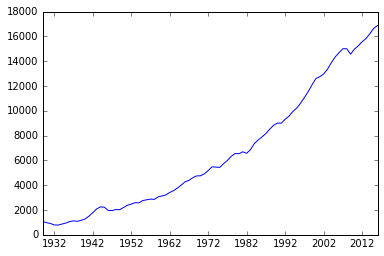

In [82]:
plt.plot(df['date'],df['value']) #plot(x,y)

## Twitter

Vamos a ver el flujo general del API de twitter utilizando el paquete tweepy

El primer paso es instalar tweepy corriendo el siguiente comando en la terminal: pip3 install tweepy

Importamos la librería 

In [1]:
import tweepy

Creamos nuestras llaves y nuestros tokens para autenticarnos

In [3]:
consumer_key = "************"
consumer_secret = "******************"

In [5]:
access_token = "****************"
access_token_secret = "*******************"

Validamos la autenticación y nos conectamos al API

In [6]:
auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [8]:
api = tweepy.API(auth)
api

Utilizamos el método home_timeline() para obtener la información sobre nuestros tweets

In [10]:
public_tweets = api.home_timeline()
public_tweets

[Status(entities={'symbols': [], 'hashtags': [{'indices': [24, 33], 'text': 'gasolina'}, {'indices': [37, 44], 'text': 'México'}, {'indices': [98, 103], 'text': 'EEUU'}], 'urls': [{'indices': [106, 129], 'url': 'https://t.co/s4oPRMXTCX', 'display_url': 'twitter.com/i/web/status/9…', 'expanded_url': 'https://twitter.com/i/web/status/926570443431170048'}], 'user_mentions': []}, source='Sprout Social', in_reply_to_user_id_str=None, in_reply_to_user_id=None, place=None, user=User(entities={'url': {'urls': [{'indices': [0, 23], 'url': 'https://t.co/SJhJ19FGVE', 'display_url': 'bbva.com', 'expanded_url': 'https://www.bbva.com/'}]}, 'description': {'urls': [{'indices': [112, 135], 'url': 'https://t.co/v8VgXpewgn', 'display_url': 'instagram.com/bbva/', 'expanded_url': 'http://www.instagram.com/bbva/'}]}}, profile_text_color='333333', profile_sidebar_fill_color='DDEEF6', statuses_count=22032, profile_image_url='http://pbs.twimg.com/profile_images/899538334678167552/YtG_gV_l_normal.jpg', profile

In [12]:
for tweet in public_tweets:
    print(tweet.text)

El dato de hoy habla de #gasolina en #México y sus disparidades con su principal socio comercial, #EEUU:… https://t.co/s4oPRMXTCX
RT @StevenSandhoff: @lkahney @lewiswallace to write a fasting cookbook for you. Easiest job. Just all white Jony Ive quality paper with not…
Just published: front page of the Financial Times international edition for November 4
https://t.co/YUdGPkE2hY https://t.co/97kxr7x5he
RT @techinsider: Here's how El Niño and La Niña affect weather https://t.co/CyLYDZMvFt
Te invitamos a tomar este Diplomado sobre #DDHH y medio ambiente. Regístrate hasta el 10 de noviembre, cupo limitad… https://t.co/osLJsZMVsb
El trámite para usar la Marca #HechoEnMéxico se puede realizar en línea y es totalmente gratuito ➡️… https://t.co/soNjSlvRSw
Will Trump Kill Statistician's Jobs https://t.co/ebJqnVbHlM
Tenable, Inc.  (@TenableCareers) is hiring https://t.co/RzpitBxjKf #amazonwebservices #security
Anuncia el Presidente @EPN el mayor yacimiento terrestre descubierto por @Pemex en lo

Finalmente hay que notar que a partir del API podemos obtener 'modelos' (objetos) que contienen distintos métodos para utilizar. Por ejemplo, el modelo 'user':

In [20]:
user = api.get_user('jpdebotton')

In [21]:
print(user.screen_name)

JPDeBotton


In [22]:
print(user.followers_count)

58


In [23]:
for friend in user.friends():
    print(friend.screen_name)

jeremyphoward
alexibagnez
luisstack
medrano_lilian
SPCCDMX
aurelionuno
MarcoColin_
Campuspartymx
TwitterVideo
PDChina
arinarmo
xuxoramos
belenbarji
WhatsApp
GreenSharkMx
Se_CIDE
vastlavDs
MoralesDavids
YunoenB
CruzJony


### Objetos tipo Cursor

Cursor es un objeto para ayudarnos a manejar paginación dentro de la API de twitter

In [25]:
cursor = tweepy.Cursor(api.user_timeline, id="twitter")
type(cursor)

tweepy.cursor.Cursor

In [ ]:
for page in cursor.pages():
    print(page)

[Status(entities={'symbols': [], 'hashtags': [{'indices': [22, 35], 'text': 'HallowKKWeen'}], 'urls': [{'indices': [74, 97], 'url': 'https://t.co/7GraelhaE4', 'display_url': 'twitter.com/i/moments/9243…', 'expanded_url': 'https://twitter.com/i/moments/924371743992512513'}], 'user_mentions': [{'screen_name': 'KimKardashian', 'indices': [3, 17], 'name': 'Kim Kardashian West', 'id_str': '25365536', 'id': 25365536}, {'screen_name': 'cher', 'indices': [56, 61], 'name': 'Cher', 'id_str': '124003770', 'id': 124003770}]}, source='Twitter for Android', in_reply_to_user_id_str=None, in_reply_to_user_id=None, place=None, user=User(entities={'url': {'urls': [{'indices': [0, 23], 'url': 'https://t.co/gN5JJwhQy7', 'expanded_url': None}]}, 'description': {'urls': []}}, profile_text_color='333333', profile_sidebar_fill_color='F6F6F6', statuses_count=6248, profile_image_url='http://pbs.twimg.com/profile_images/875087697177567232/Qfy0kRIP_normal.jpg', profile_background_tile=True, utc_offset=-25200, fol

### Search API

El Search API de twitter sólo nos permite acceder a una muestra aleatoria de tweets. Autenticación por usuario nos permite 180 queries por token cada 15 minutos, mientras que autenticación por aplicación 450 tweets cada 15 minutos. Para autotenticarnos por aplicación hacemos lo siguiente:

In [28]:
auth = tweepy.AppAuthHandler(consumer_key,consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

Podemos obtener hasta 100 tweets por query, lo que implica que podemos obtener hasta 45,000 tweets cada 15 minutos. Si excedemos esta cantidad, el argumento 'wait_on_rate_limit' le dice a tweepy que pare hasta que ya no estemos limitados. Nota: para ver nuestro límite actuales dentro de Tweepy podemos ver rate_limit_status.

In [29]:
api.rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 450, 'remaining': 450, 'reset': 1509749216}}

Vamos a utilizar una serie de hashtags que nos permitan determinar cuál es el equipo de Pokemon Go más popular en Estados Unidos

In [30]:
#Podemos restringir la localidad a un lugar utilizando place:id 
#Podemos buscar múltiples frases separadas por OR
searchQuery = 'place:96683cc9126741d1 #teammystic OR #teaminstinct OR #teamvalor OR' \
              '#teamblue OR #teamyellow OR #teamred OR' \
              '#mystic OR #valor OR #instinct OR' \
              '"team mystic" OR "team valor" OR "team instinct"'

In [31]:
#Máximo número de tweets que queremos colectar 
maxTweets = 1000000

#El Search API de twitter nos deja colectar hasta 100 tweets por query
tweetsPerQry = 100

La mejor manera de enviar nuestras querys al Search API es mediante el método Cursor. El método cursor va a mandar nuestra query hasta que lleguemos al número de tweets especificados (100k), o hasta que lleguemos al final de la base de datos de Search API. 

Después podemos iterar sobre cada tweet que nos regresa Cursor utilizando un for loop y escribiendo cada tweet a un archivo de texto utilizando la librería jsonpcikle

In [34]:
import jsonpickle

In [36]:
tweetCount = 0

#Abrir un archivo de texto en el que guardar los tweets
with open('PoGo_USA_Tutorial.json', 'w') as f:

    #Decirle al Cursor que queremos usar la Search API (api.search)
    #Indicarle nuestra query, y el máximo número de tweets a regresar
    for tweet in tweepy.Cursor(api.search,q=searchQuery).items(maxTweets) :         

        #Verificar que el tweet tiene información de localización antes de escribirlo en el archivo
        if tweet.place is not None:
            
            #Escribir el JSON y añadir uno al número de tweets que colectamos
            f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
            tweetCount += 1

    #Mostrar cuantos tweets hemos colectado
    print("Downloaded {0} tweets".format(tweetCount))

Downloaded 49 tweets


### Streaming API

Si queremos colectar nuevos tweets en tiempo real, entonces debemos usar el Streaming API de Twitter

In [39]:
#Conectándonos al streaming API 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
api = tweepy.API(auth)

Ahora debemos realizar tres pasos:
<ol>
<li> Crear una clase que herede desde StreamListener </li>
<li> Usar esta clase para crear un objeto Stream</li>
<li> Concectar la API de twitter utilizando el Stream </li>
</ol>

(1) Crear una clase que herede desde StreamListener

In [40]:
#Heredar de la clase StreamListener 
class MyStreamListener(tweepy.StreamListener):
    
    #Overload the on_status method
    def on_status(self, status):
        try:
            
            #Open a text file to save tweets to
            with open('PoGo.json', 'a') as f:
                
                #Check if the tweet has coordinates, if so write it to text
                if (status.coordinates is not None):
                    f.write(status)
                return True
         
        #Error handling
        except BaseException as e:
            print("Error on_status: %s" % str(e))
            
        return True
 
    #Error handling
    def on_error(self, status):
        print(status)
        return True

    #Timeout handling
    def on_timeout(self):
        return True 

(2) Ahora que tenemos la clase MyStreamListenes, podemos crear un objeto

In [44]:
twitter_stream = tweepy.Stream(auth,MyStreamListener())

(3) Podemos usar el método 'filter' para buscar frases particulares

In [42]:
twitter_stream.filter(track=['#teammystic','teaminstinct','#teamvalor', \
                             '#teamblue','#teamyellow','#teamred',\
                             '#mystic','#instinct','#valor', \
                             'team mystic','team instinct','team valor'])

KeyboardInterrupt: 

o bien podemos filtrar usando otros parámetros como localización

In [45]:
twitter_stream.filter(locations=[-122.75,36.8,-121.75,37.8])

Error on_status: write() argument must be str, not Status
Error on_status: write() argument must be str, not Status
Error on_status: write() argument must be str, not Status
Error on_status: write() argument must be str, not Status


KeyboardInterrupt: 

## Spotify (en proceso)

Spotipy supports two authorization flows:

<ol>
<li> The **Authorization Code flow**: This method is suitable for long-running applications which the user logs into once. It provides an access token that can be refreshed. </li>

<li> The **Client Credentials flow**: The method makes it possible to authenticate your requests to the Spotify Web API and to obtain a higher rate limit than you would </li>
</ol>

To support the Authorization Code Flow Spotipy provides a utility method util.prompt_for_user_token that will attempt to authorize the user. You can pass your app credentials directly into the method as arguments:

In [ ]:
util.prompt_for_user_token(username,scope,client_id='your-app-redirect-url',
                           client_secret='your-app-redirect-url',
                          redirect_uri='your-app-redirect-url')

In [96]:
import os

In [107]:
os.environ["SPOTIFY_CLIENT_ID"] = "5327e20ba3934515ae23a8edd676e2f9"
os.environ["SPOTIFY_CLIENT_SECRET"] = "bca498216c5a48539da85e2022fd03eb"
os.environ["SPOTIPY_REDIRECT_URI"]='https://www.spotify.com'

In [99]:
%env

{'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.XCJhmodYta/Render',
 'CLICOLOR': '1',
 'DISPLAY': '/private/tmp/com.apple.launchd.Bnm9NgHdML/org.macosforge.xquartz:0',
 'GEM_HOME': '/Users/jpdebotton/.rvm/gems/ruby-2.3.1',
 'GEM_PATH': '/Users/jpdebotton/.rvm/gems/ruby-2.3.1:/Users/jpdebotton/.rvm/gems/ruby-2.3.1@global',
 'GIT_PAGER': 'cat',
 'HOME': '/Users/jpdebotton',
 'IRBRC': '/Users/jpdebotton/.rvm/rubies/ruby-2.3.1/.irbrc',
 'JPY_PARENT_PID': '85075',
 'LC_CTYPE': 'UTF-8',
 'LESS': '-R',
 'LOGNAME': 'jpdebotton',
 'LSCOLORS': 'Gxfxcxdxbxegedabagacad',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
 'MY_RUBY_HOME': '/Users/jpdebotton/.rvm/rubies/ruby-2.3.1',
 'OLDPWD': '/Users/jpdebotton/Documents/1_2017/10_Oct_2017/Data_Analyst_JP',
 'PAGER': 'cat',
 'PATH': '/Library/Frameworks/Python.framework/Versions/3.5/bin:/Users/jpdebotton/.rvm/gems/ruby-2.3.1/bin:/Users/jpdebotton/.rvm/gems/ruby-2.3.1@global/bin:/Users/jpdebotton/.rvm/rubies/ruby-2.3.1/bin:/Lib

In [47]:
import sys
import spotipy
import spotipy.util as util

In [49]:
username = "jpdebotton"

In [50]:
scope = "user-library-read"

In [51]:
token = util.prompt_for_user_token(username,scope)


            You need to set your Spotify API credentials. You can do this by
            setting environment variables like so:

            export SPOTIPY_CLIENT_ID='your-spotify-client-id'
            export SPOTIPY_CLIENT_SECRET='your-spotify-client-secret'
            export SPOTIPY_REDIRECT_URI='your-app-redirect-url'

            Get your credentials at     
                https://developer.spotify.com/my-applications
        


SpotifyException: http status: 550, code:-1 - no credentials set

In [100]:
spotify = spotipy.Spotify()
spotify

In [101]:
name = "Maluma"

In [102]:
results = spotify.search(q='artist:' + name, type='artist')

SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/search?offset=0&limit=10&type=artist&q=artist%3AMaluma:
 No token provided

In [87]:
results = spotify.artist_albums(birdy_uri, album_type='album')

SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/artists/2WX2uTcsvV5OnS0inACecP/albums?offset=0&limit=20&album_type=album:
 No token provided

[API Key Spotify](https://developer.spotify.com/my-applications/#!/)

In [112]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

SpotifyOauthError: No client id